In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

from scipy import stats
sns.set()

In [204]:
data_set = pd.read_csv('Data_source.csv', delimiter=';')
#data_set = pd.read_csv("Data_source.csv", sep=";" , decimal=',', na_values='')
data_set.columns = ['Id','ethnicgp', 'gender', 'age', 'years', 'commit', 
'satis', 'autonom', 'routine', 'attend', 'skill', 'prody', 'qual', 'absence', 'income']



#clean dataset
null_values = data_set.isnull().sum()

# Filter and display only the columns with at least one null value
columns_with_null = null_values[null_values > 0]

for column, null_count in columns_with_null.items():
    print(f"{column}: {null_count} null values")

# Convert 'income' from string with commas to float
data_set['income'] = data_set['income'].str.replace(',', '.').astype(float)

# Replace empty strings with NaN for proper handling of missing values
data_set.replace('', pd.NA, inplace=True)

# Create dataset with missing values replaced by the mean
data_set_with_mean = data_set.copy()
for column in data_set_with_mean.columns:
    if data_set_with_mean[column].isnull().sum() > 0:  # Only fill columns with null values
        data_set_with_mean[column] = data_set_with_mean[column].fillna(data_set_with_mean[column].mean())


# Save the datasets
data_set_with_mean.to_csv('data_set_with_mean.csv', index=False)

# Display the shape of the new datasets
print(f"Dataset with mean imputation: {data_set_with_mean.shape}")

data_cleaned = data_set.dropna()
print(f"Dataset with rows removed: {data_cleaned.shape}")


data_set_with_mean.head()


age: 1 null values
years: 1 null values
commit: 2 null values
satis: 2 null values
prody: 1 null values
absence: 1 null values
income: 2 null values
Dataset with mean imputation: (70, 15)
Dataset with rows removed: (61, 15)


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,10.838235,10,9,2,3,3.246377,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,10.838235,7,15,1,3,4.000000,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.000000,7,8,1,4,3.000000,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.000000,7,10,2,3,3.000000,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.000000,11,18,1,3,5.000000,3,0.0,18.6


In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x='gender', data= data_set)
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.show()

In [ ]:
ethnic_counts = data_set['ethnicgp'].value_counts()
ethnic_labels = ['White', 'Asian', 'West Indian', 'African']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0, 0, 0)
plt.figure(figsize = (6,7))

wedges, texts, autotexts = plt.pie(
    ethnic_counts,
    labels=None, 
    autopct='%1.1f%%',
    startangle=150,
    colors=colors,
    explode=explode,
    shadow=True
)

# Step 4: Create a custom legend with stacked labels
# Create a list of handle objects for the legend
handles = []
for i, label in enumerate(ethnic_labels):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label,
                                markerfacecolor=colors[i], markersize=10))

# Add the legend to the plot
plt.legend(handles=handles, title='Ethnic Groups', loc='upper right', bbox_to_anchor=(1.2, 1))



plt.title('Ethnic Group Distribution', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
age_summary = data_set['age'].describe()[['min', '25%', '50%', '75%', 'max']]
print("Five-Number Summary for Age:")
print(age_summary)

plt.figure(figsize=(8, 5))
sns.boxplot(x='age', data=data_set)
plt.title('Box Plot of Age')
plt.show()



In [ ]:
income_mean = data_set['income'].mean()
income_std = data_set['income'].std()

print(f"Mean of Income: {income_mean}")
print(f"Standard Deviation of Income: {income_std}")

# Histogram of income
plt.figure(figsize=(8, 5))
plt.hist(data_set['income'], bins=20, color='darkblue', edgecolor='green')
plt.title('Histogram of Income')
plt.xlabel('Income (in £1000)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='absence', y='income', marker='*', c='red',s=150, data=data_set)
plt.title('Scatter Plot of Income vs. Absence')
plt.xlabel('Absence (Days)')
plt.ylabel('Income (in £1000)')
plt.show()

R-squared: 0.06243389452270087


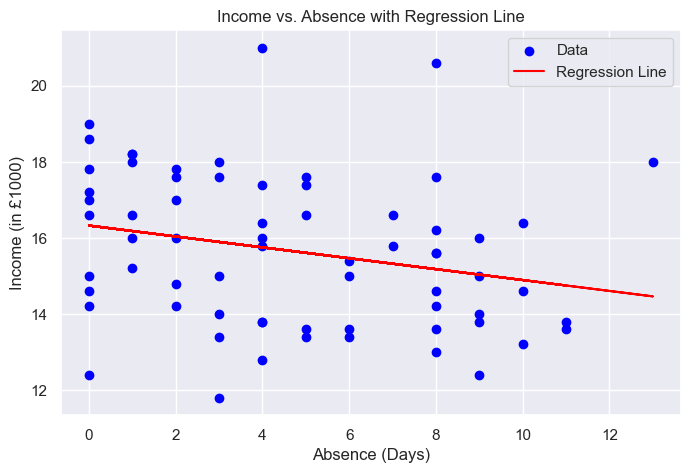

In [167]:
# removed missing values from dataset
X = data_cleaned[['absence']]
y = data_cleaned[['income']]
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['absence'], data_cleaned['income'], color='blue', label='Data')
plt.plot(data_cleaned['absence'], y_pred, color='red', label='Regression Line')
plt.title('Income vs. Absence with Regression Line')
plt.xlabel('Absence (Days)')
plt.ylabel('Income (in £1000)')
plt.legend()
plt.show()

R-squared: 0.061913392866861816


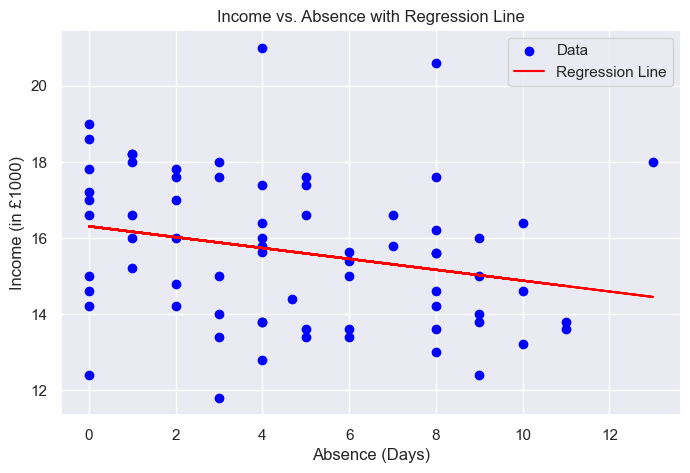

In [169]:
# fill missing values
data_set['absence'] = data_set['absence'].fillna(data_set['absence'].mean())
data_set['income'] = data_set['income'].fillna(data_set['income'].mean())

X = data_set[['absence']]
y = data_set[['income']]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 5))
plt.scatter(data_set['absence'], data_set['income'], color='blue', label='Data')
plt.plot(data_set['absence'], y_pred, color='red', label='Regression Line')
plt.title('Income vs. Absence with Regression Line')
plt.xlabel('Absence (Days)')
plt.ylabel('Income (in £1000)')
plt.legend()
plt.show()

In [210]:
#--Multiple Regression
#Study a multiple regression model where satis (job satisfaction) is the dependent variable, and the following are independent variables: commit, autonom, income, skill, qual, age, and years.
#Identify non-significant variables and simplify the model by removing them.

In [206]:
X_multi = data_set_with_mean[['commit', 'autonom', 'income', 'skill', 'qual', 'age', 'years']]
y_multi = data_set_with_mean['satis']

# Fit the multiple regression model
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)

# Add a constant to the model (required for statsmodels to include an intercept)
X = sm.add_constant(X)

# Step 5: Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Step 6: View the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4.488
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0378
Time:                        14:20:40   Log-Likelihood:                -143.93
No. Observations:                  70   AIC:                             291.9
Df Residuals:                      68   BIC:                             296.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3064      0.390     41.813      0.0

In [208]:
X_simplified = data_set_with_mean[['commit', 'autonom', 'income', 'skill', 'qual']]  # Remove 'age' and 'years'

# Add a constant to the simplified model
X_simplified = sm.add_constant(X_simplified)

# Step 8: Refit the simplified model
model_simplified = sm.OLS(y, X_simplified).fit()

# Step 9: View the summary of the simplified model
print(model_simplified.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.378e+29
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:32:47   Log-Likelihood:                 2144.3
No. Observations:                  70   AIC:                            -4277.
Df Residuals:                      64   BIC:                            -4263.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.11e-15   1.32e-14      0.084      0.9

In [217]:
mean_satis = data_set_with_mean['satis'].mean()
std_satis = data_set_with_mean['satis'].std()
n_satis = len(data_set_with_mean['satis'])
#print(f"Mean of satis: {mean_satis}, Standard Deviation of satis: {std_satis}, n = {n_satis}")
# Calculate standard error
se_satis = std_satis / np.sqrt(n_satis)

# Calculate 95% confidence interval
ci_satis = stats.t.interval(0.95, df=n_satis-1, loc=mean_satis, scale=se_satis)
ci_satis_clean = tuple(map(float, ci_satis))
print(f"Confidence Interval for Job Satisfaction (satis): {ci_satis_clean}")

satis_men = data_set_with_mean[data_set_with_mean['gender'] == 1]['satis']
satis_women = data_set[data_set_with_mean['gender'] == 2]['satis']

mean_men = satis_men.mean()
mean_women = satis_women.mean()

std_men = satis_men.std()
std_women = satis_women.std()

n_men = len(satis_men)
n_women = len(satis_women)

# Standard error of the difference
se_diff = np.sqrt((std_men**2 / n_men) + (std_women**2 / n_women))

# Mean difference
mean_diff = mean_men - mean_women

# 95% confidence interval for the difference in means
ci_diff = stats.t.interval(0.95, df=min(n_men, n_women)-1, loc=mean_diff, scale=se_diff)
ci_diff_clean = tuple(map(float, ci_diff))
print(f"Confidence Interval for the Difference in Job Satisfaction between Men and Women: {ci_diff_clean}")

Confidence Interval for Job Satisfaction (satis): (10.062020962148376, 11.614449626086921)
Confidence Interval for the Difference in Job Satisfaction between Men and Women: (-1.3849796796368963, 1.8464694864777484)


In [ ]:
#5. Mann-Whitney and Kruskal-Wallis Tests
#Use the Mann-Whitney-Wilcoxon test to check if there is a significant difference in skill levels between men and women. Compare the results with the confidence interval.
#Use the Kruskal-Wallis test to determine if there is a significant difference in absence among ethnic groups. Compare this with results from One-Way ANOVA.

In [220]:
##Mann-Whitney-Wilcoxon Test
# Split data into two groups based on gender
men_skills = data_cleaned[data_cleaned['gender'] == 1]['skill']
women_skills = data_cleaned[data_cleaned['gender'] == 2]['skill']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(men_skills, women_skills)

# Display the results
print(f"Mann-Whitney U Test Statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in skill levels between men and women.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in skill levels between men and women.")

Mann-Whitney U Test Statistic: 520.5, p-value: 0.4032893852621183
Fail to reject the null hypothesis: There is no significant difference in skill levels between men and women.


In [222]:
## Kruskal-Wallis Test

# Split data by ethnic groups
ethnic_groups = [data_cleaned[data_cleaned['ethnicgp'] == i]['absence'] for i in data_cleaned['ethnicgp'].unique()]

# Perform Kruskal-Wallis H test
stat, p_value = kruskal(*ethnic_groups)

print(f"Kruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in absence among ethnic groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in absence among ethnic groups.")

Kruskal-Wallis Test Statistic: 2.4084534950343763, p-value: 0.49206294724690613
Fail to reject the null hypothesis: There is no significant difference in absence among ethnic groups.
